In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import beta

In [21]:
def polya(a0, b0, n):
    a = a0
    b = b0
    for i in range(n):
        if np.random.rand() <= b / (a + b):
            b += 1
        else:
            a += 1
    return b / (a + b)


def beta_fn(x, a, b):
    return x**(b - 1) * (1 - x)**(a - 1) / beta(a, b)

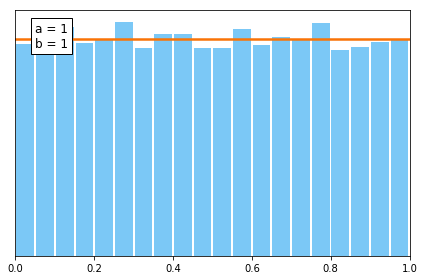

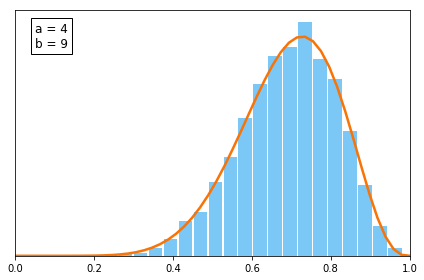

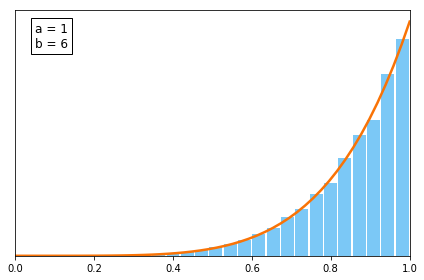

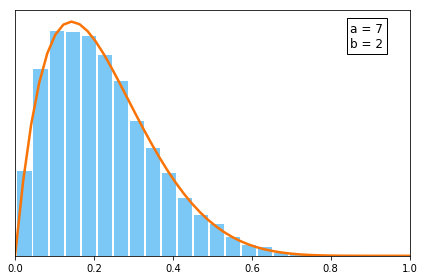

CPU times: user 30 s, sys: 1.15 s, total: 31.1 s
Wall time: 28.8 s


In [49]:
%%time
def plot_distrib(a0, b0, num_runs=10000, n=1000):
    data = [polya(a0, b0, n) for _ in range(num_runs)]
    plt.hist(data, density=True, bins=20, color="xkcd:lightblue", rwidth=0.9)
    x = np.linspace(0., 1., 50)
    plt.plot(x, beta_fn(x, a0, b0), color="xkcd:orange", linewidth=2.5)
    plt.xlim([0, 1])
    plt.yticks([])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05 if b0 >= a0 else 0.85, 0.95, 
             "a = {}\nb = {}".format(a0, b0), transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(facecolor='white'))
    plt.tight_layout()
    plt.savefig("polya_{}_{}.pdf".format(a0, b0), dpi=300, bbox="tight_inches")
    plt.show()
    
plot_distrib(1, 1)
plot_distrib(4, 9)
plot_distrib(1, 6)
plot_distrib(7, 2)